In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
data = pd.read_csv('vehicles.csv')

In [3]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

## EDA

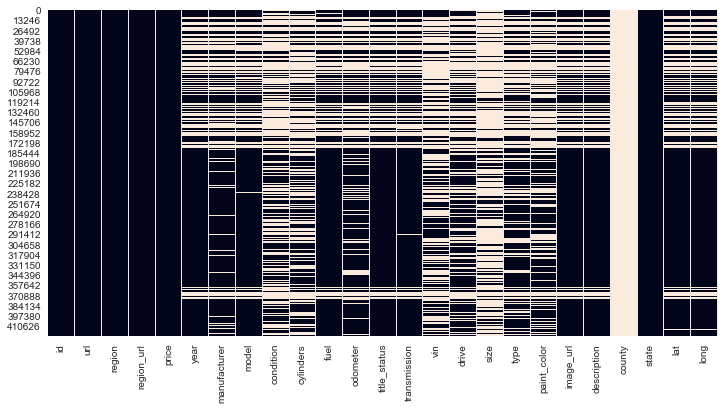

In [4]:
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(), cbar=False)

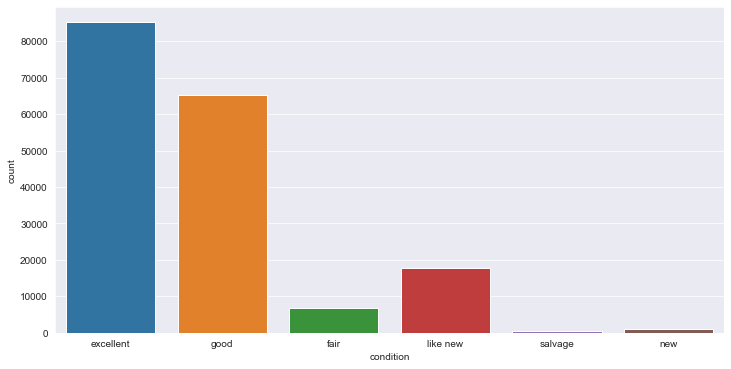

In [5]:
plt.figure(figsize=(12,6))
sns.countplot(x="condition", data=data)

In [6]:
drop_columns = ['id','url', 'region_url', 'vin', 'image_url', 'description', 'lat', 'long','county','region']
df = data.drop(columns = drop_columns)

In [7]:
df.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'state'],
      dtype='object')

In [8]:
df.describe()

,price,year,odometer
count,4.238570e+05,328743.000000,2.705850e+05
mean,5.779437e+04,2009.827358,9.942578e+04
std,1.002581e+07,10.135809,1.204833e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,4.499000e+03,2007.000000,4.432400e+04
50%,9.995000e+03,2012.000000,9.174900e+04
75%,1.899500e+04,2016.000000,1.372370e+05
max,3.808256e+09,2021.000000,1.000000e+07


In [9]:
rr=sorted(df["price"])
quantile1, quantile3= np.percentile(rr,[10,90])
print(quantile1,quantile3)

389.6000000000058 31500.0


In [10]:
df=df[(df.price < 31500) & (df.price >= 389 )]
df.shape

(339091, 15)

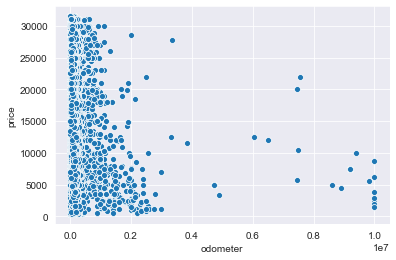

In [11]:
df["odometer"].isna().sum()
sns.scatterplot(x="odometer", y="price", data=df)

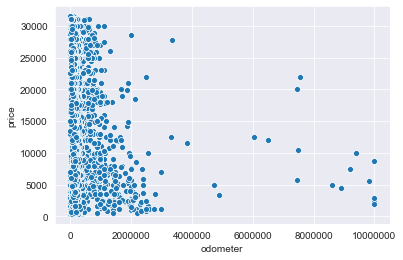

In [12]:
df.drop(df[df["odometer"]==df["odometer"].max()].index,inplace=True)
df.drop(df[df["odometer"]==0.0].index,inplace=True)
ax = sns.scatterplot(x="odometer", y="price", data=df)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

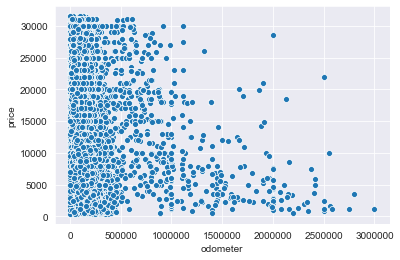

In [13]:
df["odometer"].isna().sum()
df=df[(df.odometer < 3000000)]
ax = sns.scatterplot(x="odometer", y="price", data=df)
ax.get_xaxis().get_major_formatter().set_scientific(False)

In [14]:
df["odometer"].isna().sum()

0

In [15]:
df["year"].isna().sum()

556

In [16]:
df["year"].min()

1919.0

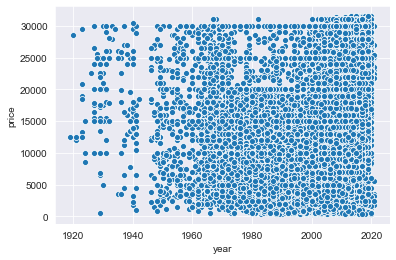

In [17]:
df=df.dropna(subset=['year'])
bx = sns.scatterplot(x="year", y="price", data=df)

In [18]:
df=df[(df.year > 1940)]

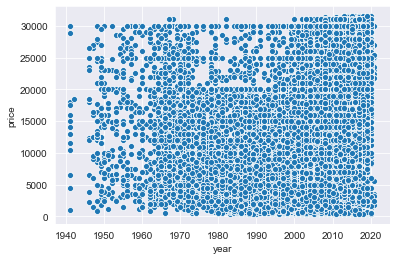

In [19]:
bx = sns.scatterplot(x="year", y="price", data=df)

In [20]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
size,13772600,64.236
condition,8363900,39.009
cylinders,6944300,32.388
paint_color,5162100,24.076
drive,4964100,23.153
type,4078400,19.022
manufacturer,663900,3.096
model,166100,0.775
fuel,150900,0.704
title_status,117100,0.546


In [21]:
df.condition.value_counts()

excellent    62820
good         50523
like new     11915
fair          4827
new            370
salvage        313
Name: condition, dtype: int64

In [22]:
excellent_odo_mean = df[df['condition'] == 'excellent']['odometer'].mean()
good_odo_mean = df[df['condition'] == 'good']['odometer'].mean()
like_new_odo_mean = df[df['condition'] == 'like new']['odometer'].mean()
salvage_odo_mean = df[df['condition'] == 'salvage']['odometer'].mean()
fair_odo_mean = df[df['condition'] == 'fair']['odometer'].mean()

print('Like new average odometer:', round( like_new_odo_mean,2))
print('Excellent average odometer:', round( excellent_odo_mean,2))
print('Good average odometer:', round( good_odo_mean,2))
print('Fair average odometer:', round( fair_odo_mean,2))
print('Salvage average odometer:', round( salvage_odo_mean,2))

Like new average odometer: 83059.2
Excellent average odometer: 110880.1
Good average odometer: 119035.99
Fair average odometer: 183139.5
Salvage average odometer: 168979.51


In [23]:
df.loc[df.year>=2019, 'condition'] = df.loc[df.year>=2019, 'condition'].fillna('new')

In [24]:
df.loc[df['odometer'] <= like_new_odo_mean, 'condition'] = df.loc[df['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')
df.loc[df['odometer'] >= fair_odo_mean, 'condition'] = df.loc[df['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')

df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'] = df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
size,13772600,64.236
cylinders,6944300,32.388
paint_color,5162100,24.076
drive,4964100,23.153
type,4078400,19.022
manufacturer,663900,3.096
model,166100,0.775
fuel,150900,0.704
title_status,117100,0.546
transmission,88800,0.414


In [25]:
df=df.dropna(subset=['title_status','fuel','transmission','model','manufacturer'])
df=df.drop(["size"],axis=1)
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
cylinders,6544000,32.190
paint_color,4892900,24.068
drive,4666100,22.953
type,3846700,18.922
price,0,0.000
year,0,0.000
manufacturer,0,0.000
model,0,0.000
condition,0,0.000
fuel,0,0.000


In [26]:
df = df
df['paint_color'] = df['paint_color'].fillna(method='ffill')
df['drive'] = df['drive'].fillna(method='ffill')
df['type'] = df['type'].fillna(method='ffill')
df['cylinders'] = df['cylinders'].fillna(method='ffill')

In [27]:
df.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            3
paint_color     0
state           0
dtype: int64

In [28]:
df=df.dropna(subset=['cylinders','drive','type'])
df.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

In [29]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()
df.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state'],
      dtype='object')

In [30]:
df[['manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state']]=df[['manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state']].apply(le.fit_transform)

In [31]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
y= df.price
X= df.drop('price',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(162630, 13) (162630,)
(40658, 13) (40658,)


In [32]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()   
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [33]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=50, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [34]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

In [35]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 1869.3
Mean Squared Error: 9231939.55
Root Mean Squared Error: 3038.41


In [36]:
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
import seaborn as sns
plt.style.use('ggplot')

In [37]:
model = MLPRegressor()
model.fit(X_train, y_train)
print(model)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)


D:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [38]:
expected_y  = y_test
predicted_y = model.predict(X_test)

r2 = metrics.r2_score(expected_y, predicted_y)
print("R2 Score: ", r2)

R2 Score:  0.5687400652603274


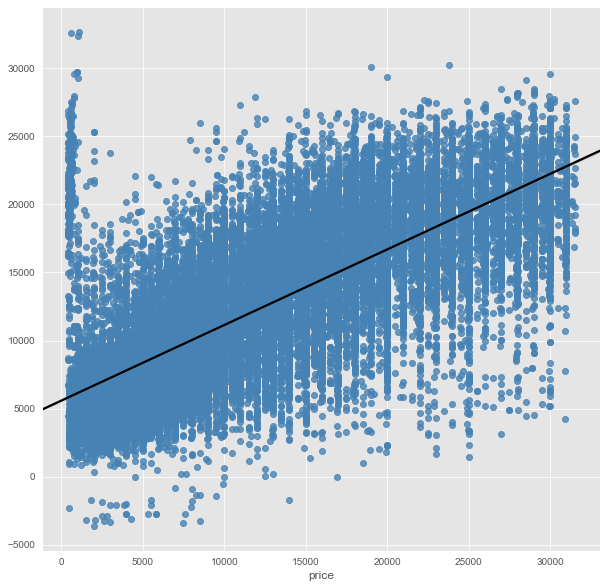

In [39]:
plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"color": "steelblue"}, line_kws={"color": "black"})